In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor

In [74]:
mart_data = pd.read_csv('mart_data.csv')
mart_data['Item_Outlet_Sales'] = np.random.randint(100, 901, size=len(mart_data))

In [75]:
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,389
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,193
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,539
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,518
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,808


In [76]:
mart_data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5676,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,564
5677,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,831
5678,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,458
5679,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,427
5680,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,143


In [77]:
mart_data.shape

(5681, 12)

In [78]:
mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,4705.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903,498.644429
std,4.664849,0.051252,61.809091,8.372256,228.450885
min,4.555000,0.000000,31.990000,1985.000000,100.000000
25%,8.645000,0.027047,94.412000,1987.000000,300.000000
50%,12.500000,0.054154,141.415400,1999.000000,501.000000
75%,16.700000,0.093463,186.026600,2004.000000,693.000000
max,21.350000,0.323637,266.588400,2009.000000,900.000000


In [79]:
mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
 11  Item_Outlet_Sales          5681 non-null   int32  
dtypes: float64(3), int32(1), int64(1), object(7)
memory usage: 510.5+ KB


In [80]:
mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [81]:
val = mart_data['Item_Weight'].mean()

print(val)

12.695633368756642


In [82]:
## filling the missing values in "Item_Weight" column with "Mean Value"
mart_data['Item_Weight'].fillna(val, inplace = True)

C:\Users\divya\AppData\Local\Temp\ipykernel_8264\2527157967.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mart_data['Item_Weight'].fillna(val, inplace = True)


In [83]:
val2 = mart_data['Outlet_Size'].mode()[0]
print(val2)

Medium


In [84]:
mart_data['Outlet_Size'].fillna(val2, inplace = True)

C:\Users\divya\AppData\Local\Temp\ipykernel_8264\1891972636.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mart_data['Outlet_Size'].fillna(val2, inplace = True)


In [85]:
## now check if there is any empty value or not
mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [86]:
mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903,498.644429
std,4.245189,0.051252,61.809091,8.372256,228.450885
min,4.555000,0.000000,31.990000,1985.000000,100.000000
25%,9.195000,0.027047,94.412000,1987.000000,300.000000
50%,12.695633,0.054154,141.415400,1999.000000,501.000000
75%,15.850000,0.093463,186.026600,2004.000000,693.000000
max,21.350000,0.323637,266.588400,2009.000000,900.000000


In [87]:
sns.set()

C:\Users\divya\AppData\Local\Temp\ipykernel_8264\3133890514.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart_data["Item_Weight"])


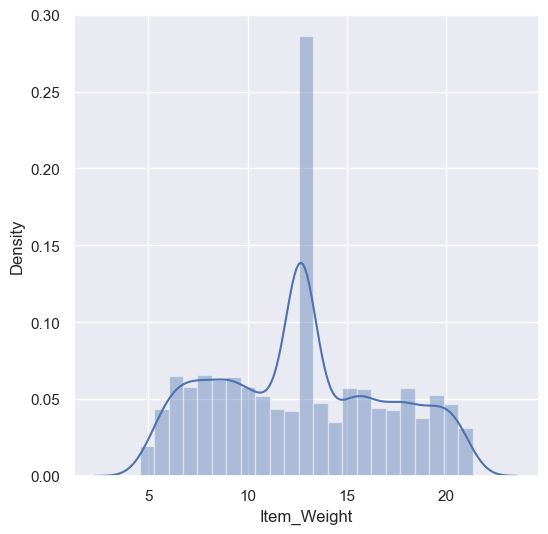

In [88]:
plt.figure(figsize=(6,6))
sns.distplot(mart_data["Item_Weight"])
plt.show()

C:\Users\divya\AppData\Local\Temp\ipykernel_8264\289539036.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart_data['Item_Visibility'])


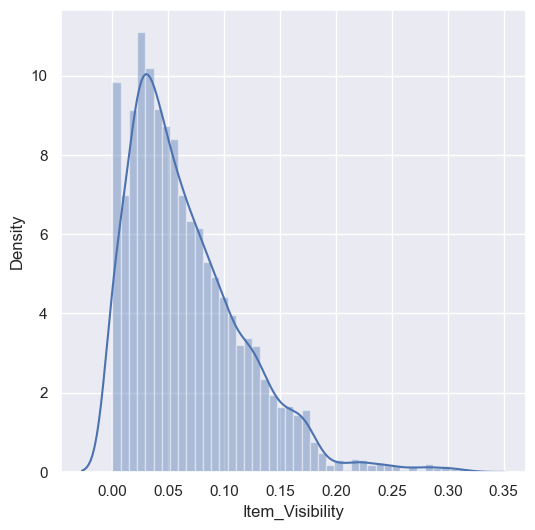

In [89]:
## Item visiblity

plt.figure(figsize=(6,6))
sns.distplot(mart_data['Item_Visibility'])
plt.show()

C:\Users\divya\AppData\Local\Temp\ipykernel_8264\1360977291.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart_data["Item_MRP"])


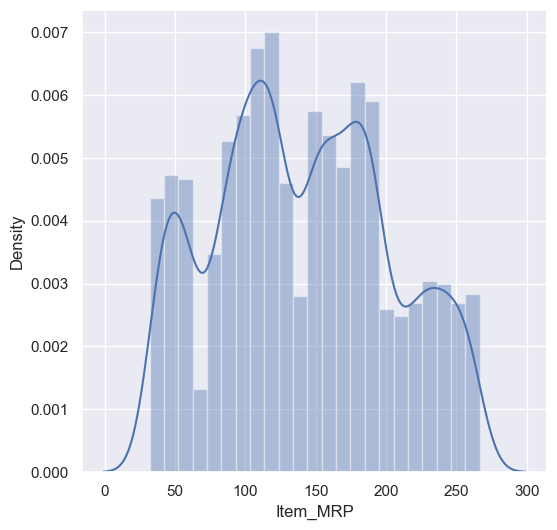

In [90]:
## MRP distribution

plt.figure(figsize=(6,6))
sns.distplot(mart_data["Item_MRP"])
plt.show()

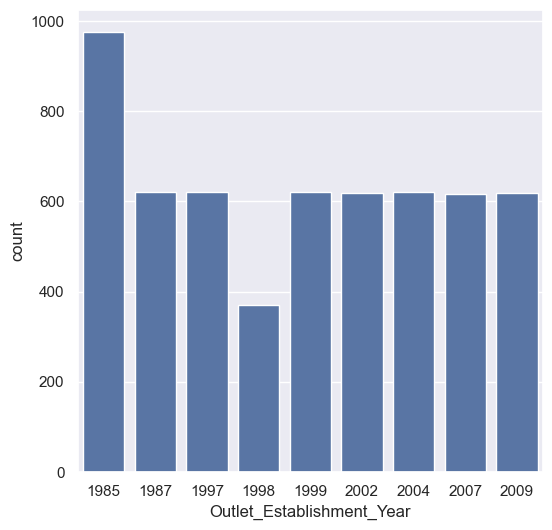

In [91]:
## Outlet Establishment Distribution 

plt.figure(figsize=(6,6))
sns.countplot(x = 'Outlet_Establishment_Year' , data=mart_data)
plt.show()

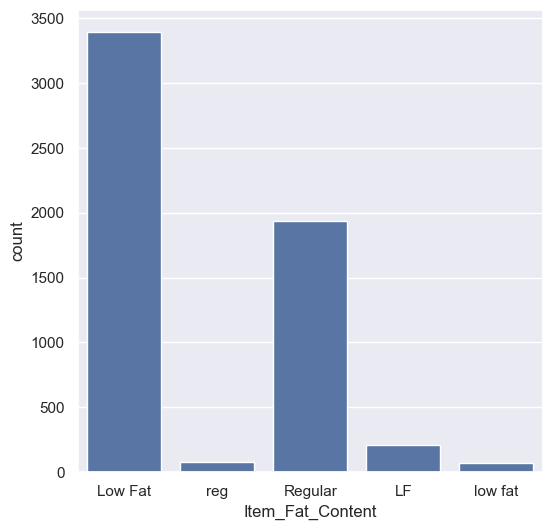

In [92]:
## Item Fat content column 

plt.figure(figsize=(6,6))
sns.countplot(x = "Item_Fat_Content", data = mart_data)
plt.show()

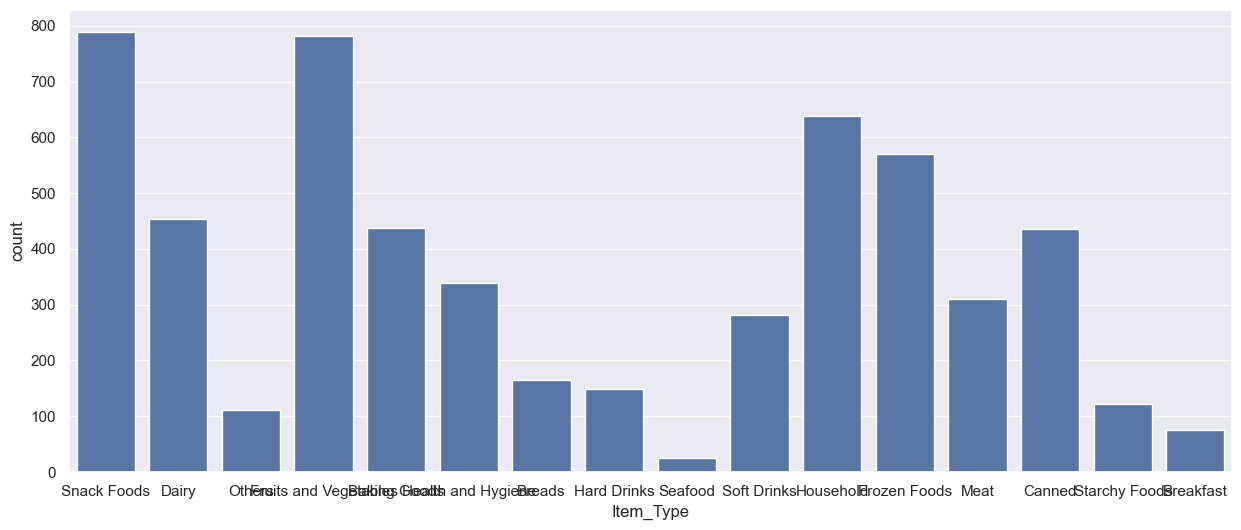

In [93]:
## Item type column 

plt.figure(figsize=(15,6))
sns.countplot( x = 'Item_Type', data = mart_data)
plt.show()

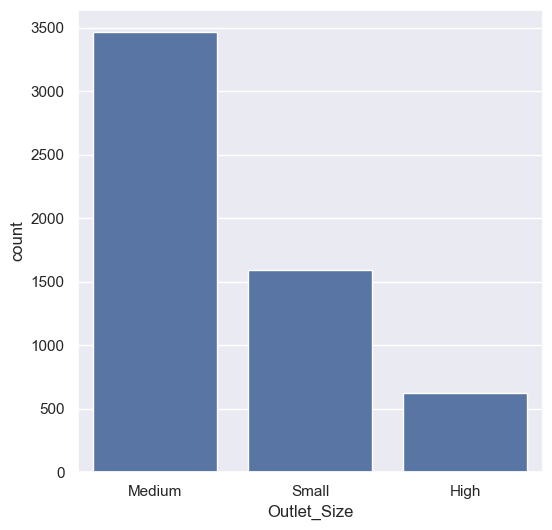

In [94]:
# Outlet size column 

plt.figure(figsize=(6,6))
sns.countplot(x = "Outlet_Size", data = mart_data)
plt.show()

In [95]:
## Data Pre processing 

mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,389
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,193
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,539
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,518
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,808


In [96]:
mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: count, dtype: int64

In [97]:
mart_data.replace({"Item_Fat_Content": {'low fat': 'Low Fat' , 'LF': 'Low Fat', 'reg': 'Regular'}} ,inplace = True)

In [98]:
mart_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    3668
Regular    2013
Name: count, dtype: int64

### Label Encoding

In [99]:
encoder = LabelEncoder()

In [100]:
mart_data['Item_Identifier'] = encoder.fit_transform(mart_data["Item_Identifier"])

mart_data['Item_Fat_Content'] = encoder.fit_transform(mart_data["Item_Fat_Content"])

mart_data['Item_Type'] = encoder.fit_transform(mart_data["Item_Type"])

mart_data['Outlet_Identifier'] = encoder.fit_transform(mart_data["Outlet_Identifier"])

mart_data['Outlet_Location_Type'] = encoder.fit_transform(mart_data["Outlet_Location_Type"])

mart_data['Outlet_Type'] = encoder.fit_transform(mart_data["Outlet_Type"])

mart_data['Outlet_Size'] = encoder.fit_transform(mart_data["Outlet_Size"])

In [101]:
mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1,389
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,1,1,1,193
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,1,2,0,539
3,809,7.315000,0,0.015388,13,155.0340,2,2007,1,1,1,518
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3,808


In [103]:
X = mart_data.drop('Item_Outlet_Sales', axis= 1)
Y = mart_data['Item_Outlet_Sales']

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2 , random_state= 2)

In [106]:
regressor = XGBRegressor()

In [107]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [110]:
## prediction on training data 

Y_train_pred = regressor.predict(X_train)

# r2 squared value
r2_train = metrics.r2_score(Y_train, Y_train_pred)
print("R Squared Value: ", r2_train)


R Squared Value:  0.7204328775405884


In [111]:
## prediction on testing data 

Y_test_pred = regressor.predict(X_test)

# r2 squared value
r2_test = metrics.r2_score(Y_test, Y_test_pred)
print("R Squared Value: ", r2_test)

R Squared Value:  -0.2880129814147949
